# Trabalho Final - Machine Learning

* Arthur Bernardes Suematsu
* Eduardo Henrique Silva Souza
* Gustavo Almeida Brezzi
* Wagner Sanches Gonçalves

Neste trabalho, como parte do time de analistas da Quantum Finance, vocês deverão explorar uma base de dados originalmente utilizada para classificação de score de crédito, disponível no Kaggle (https://www.kaggle.com/datasets/parisrohan/credit-score-classification), utilizando técnicas de Análise Exploratória de Dados (EDA) e algoritmos de Machine Learning supervisionados.


O objetivo é aplicar e interpretar os resultados obtidos, assim como criar um sistema que gere valor a partir da análise da base de dados.

**Modelo de Classificação Supervisionada**


Desenvolver um modelo de classificação supervisionada para prever a classificação de crédito dos indivíduos presentes na base.


Passos esperados:

1. Realizar uma análise exploratória dos dados (EDA) para entender as características principais da base e as relações entre variáveis; 2 pontos

2. Implementar um pipeline de modelo de classificação usando Random Forest, XGBoost e LightGBM. Use GridSearch para otimizar os parametros de cada modelo; 4 pontos

3. Avaliar os resultados utilizando a métrica mais adequada e **justifique** sua escolha; 2 pontos

4. Apresentar os resultados, indicando a métrica no conjunto de treino (train.csv) e explicar como o modelo pode ser utilizado para decisões financeiras. 2 pontos


Entregáveis:

1. Este jupyter notebook executado e com os resultados aparentes (não serão aceitoa outros formatos)

### Importação das bibliotecas necessárias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

### Carregamento e exploração inicial dos dados

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Verificando as dimensões dos dados
print(f"Dimensões do conjunto de treino: {train_data.shape}")
print(f"Dimensões do conjunto de teste: {test_data.shape}")

Dimensões do conjunto de treino: (13524, 28)
Dimensões do conjunto de teste: (13685, 27)


In [7]:
train_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
train_data.columns.tolist()


['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [9]:
test_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3.0,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2.0,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [10]:
test_data.columns.tolist()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [11]:
# Observando a diferença entre os conjuntos (teste não tem Credit_Score)
train_cols = set(train_data.columns.tolist())
test_cols = set(test_data.columns.tolist())
print("Colunas apenas no treino:", train_cols - test_cols)
print("Colunas apenas no teste:", test_cols - train_cols)

Colunas apenas no treino: {'Credit_Score'}
Colunas apenas no teste: set()


### Análise exploratória de dados (EDA)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13524 entries, 0 to 13523
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13524 non-null  object 
 1   Customer_ID               13524 non-null  object 
 2   Month                     13523 non-null  object 
 3   Name                      12182 non-null  object 
 4   Age                       13523 non-null  object 
 5   SSN                       13523 non-null  object 
 6   Occupation                13523 non-null  object 
 7   Annual_Income             13523 non-null  object 
 8   Monthly_Inhand_Salary     11477 non-null  float64
 9   Num_Bank_Accounts         13523 non-null  float64
 10  Num_Credit_Card           13523 non-null  float64
 11  Interest_Rate             13523 non-null  float64
 12  Num_of_Loan               13523 non-null  object 
 13  Type_of_Loan              11984 non-null  object 
 14  Delay_

In [13]:
train_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,11477.000000,13523.000000,13523.000000,13523.000000,13523.000000,13240.000000,13523.000000,13523.000000
mean,4352.247567,17.776751,23.724248,73.291577,21.105894,25.550227,32.287814,1417.478232
std,3218.057062,122.008497,134.639479,465.977347,14.541289,181.761323,5.151048,8272.233614
min,355.208333,0.000000,0.000000,1.000000,-5.000000,0.000000,20.172942,0.000000
25%,1683.101667,3.000000,4.000000,7.000000,10.000000,3.000000,27.978240,30.015558
50%,3325.341838,6.000000,5.000000,14.000000,18.000000,5.000000,32.313498,69.602920
75%,6155.640000,7.000000,7.000000,20.000000,28.000000,9.000000,36.505636,171.077024
max,14855.930000,1789.000000,1486.000000,5747.000000,67.000000,2592.000000,50.000000,82204.000000


In [14]:
train_data.isnull().sum()

,0
ID,0
Customer_ID,0
Month,1
Name,1342
Age,1
SSN,1
Occupation,1
Annual_Income,1
Monthly_Inhand_Salary,2047
Num_Bank_Accounts,1


In [15]:
train_data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor', nan], dtype=object)

In [16]:
# Verificando a distribuição da variável alvo
print("\nDistribuição da variável alvo (Credit_Score):")
print(train_data['Credit_Score'].value_counts())
print(train_data['Credit_Score'].value_counts(normalize=True) * 100)


Distribuição da variável alvo (Credit_Score):
Credit_Score
Standard    7103
Poor        4008
Good        2412
Name: count, dtype: int64
Credit_Score
Standard    52.525327
Poor        29.638394
Good        17.836279
Name: proportion, dtype: float64


Pré-processamento

In [17]:
def duplicate_values(df):
    print("Validação de duplicação.")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("Existem", num_duplicates, "duplicadas.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicadas excluidas")
    else:
        print("Não existem duplicadas")

duplicate_values(train_data)
duplicate_values(test_data)

Validação de duplicação.
Não existem duplicadas
Validação de duplicação.
Não existem duplicadas


In [18]:
# Verificando valores inválidos ou inconsistentes em colunas numéricas
print("Verificando valores numéricos inválidos...")
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numeric_cols:
    invalid_values = train_data[~train_data[col].astype(str).str.replace('.', '').str.replace('-', '').str.isdigit()]
    if not invalid_values.empty:
        print(f"Coluna {col} contém valores não numéricos: {invalid_values[col].unique()}")

Verificando valores numéricos inválidos...
Coluna Monthly_Inhand_Salary contém valores não numéricos: [nan]
Coluna Num_Bank_Accounts contém valores não numéricos: [nan]
Coluna Num_Credit_Card contém valores não numéricos: [nan]
Coluna Interest_Rate contém valores não numéricos: [nan]
Coluna Delay_from_due_date contém valores não numéricos: [nan]
Coluna Num_Credit_Inquiries contém valores não numéricos: [nan]
Coluna Credit_Utilization_Ratio contém valores não numéricos: [nan]
Coluna Total_EMI_per_month contém valores não numéricos: [nan]


Aqui pudemos notar que existem valores que não fazem sentindo para o campo Idade

In [19]:
train_data['Age'].unique()

array(['23', '-500', '28_', '28', '34', '54', '55', '21', '31', '33',
       '34_', '7580', '30', '30_', '24', '24_', '44', '45', '40', '41',
       '32', '33_', '35', '35_', '36', '39', '37', '181', '20', '46',
       '26', '42', '19', '31_', '48', '995', '40_', '37_', '38', '54_',
       '5079', '43', '21_', '22', '6409', '16', '7080', '18', '849',
       '3885', '20_', '15', '27', '43_', '38_', '25', '3052', '14',
       '5342', '17', '18_', '4431', '2657', '2111_', '46_', '47', '1032',
       '16_', '19_', '47_', '456', '5717', '53_', '53', '56', '25_',
       '27_', '55_', '3169', '1191', '29', '42_', '7140', '48_', '49',
       '49_', '8233', '6955', '2534', '3115', '7657', '51', '50', '5112',
       '50_', '32_', '6452', '2744', '22_', '17_', '1439', '29_', '5795',
       '4872', '1772', '15_', '1383', '5657', '52', '1934', '51_', '8352',
       '3734', '26_', '2056', '39_', '7508', '2339', '14_', '8406',
       '1424', '36_', '6953', '5626', '4471', '548', '44_', '769', '5490',

In [20]:
train_data['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect', nan], dtype=object)

Então criamos uma função para limpar e converter valores

In [21]:
# Função para limpar e converter valores
def clean_data(df):
    df_copy = df.copy()

    # colunas que não serão usadas
    df_copy = df_copy.drop(['ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan', 'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis = 1)

    # Tratando valores especiais como NaN
    for col in df_copy.columns:
        df_copy[col] = df_copy[col].replace('_', np.nan)
        df_copy[col] = df_copy[col].replace('!@9#%8', np.nan)
        df_copy[col] = df_copy[col].replace('#F%$D@*&8', np.nan)
    # preenche o na do Credit_Mix com desconhecido
    df_copy['Credit_Mix'].fillna('Unknown', inplace=True)
    df_copy['Credit_Mix'] = df_copy['Credit_Mix'].astype('object')

    # Tratando valores especiais na coluna Occupation
    df_copy['Occupation'] = df_copy['Occupation'].replace('_______', 'Other')
    df_copy.loc[pd.isna(df_copy['Occupation']), 'Occupation'] = 'Other'

    # Limpando e convertendo a coluna Age para numérico
    df_copy['Age'] = pd.to_numeric(df_copy['Age'].astype(str).str.replace('_', ''), errors='coerce')
    # Substituir valores inválidos (negativos ou muito altos) por NaN
    df_copy.loc[df_copy['Age'] < 0, 'Age'] = np.nan
    df_copy.loc[df_copy['Age'] > 100, 'Age'] = np.nan

    # Preencher NaN com a mediana das idades válidas
    mediana_idade = df_copy['Age'].median()
    df_copy['Age'].fillna(mediana_idade, inplace=True)

    # Convertendo Credit_History_Age para numérico (em meses)
    def convert_credit_history(x):
        if pd.isna(x) or x == 'NA':
            return np.nan
        try:
            years = 0
            months = 0
            if 'Years' in str(x):
                years = int(str(x).split('Years')[0].strip())
            if 'Months' in str(x):
                months = int(str(x).split('Months')[0].split('and')[-1].strip())
            return years * 12 + months
        except:
            return np.nan

    df_copy['Credit_History_Age'] = df_copy['Credit_History_Age'].apply(convert_credit_history)
        # Preencher NaN com a mediana dos valores válidos de Credit_History_Age
    mediana_credit_history = df_copy['Credit_History_Age'].median()
    df_copy['Credit_History_Age'].fillna(mediana_credit_history, inplace=True)


    # Convertendo colunas numéricas
    numeric_cols = ['Age','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Credit_History_Age',
                  'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                  'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
                  'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                  'Amount_invested_monthly', 'Monthly_Balance']

    for col in numeric_cols:
        # Primeiro limpar quaisquer caracteres não numéricos
        if col in df_copy.columns:
            # Converter para string, remover caracteres não numéricos exceto ponto decimal
            df_copy[col] = df_copy[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True)
            # Converter para float
            df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

    return df_copy

In [22]:
# Aplicando a limpeza aos conjuntos de dados
train_data = clean_data(train_data)
test_data = clean_data(test_data)

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13685 entries, 0 to 13684
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       13685 non-null  float64
 1   Occupation                13685 non-null  object 
 2   Annual_Income             13684 non-null  float64
 3   Num_Bank_Accounts         13684 non-null  float64
 4   Num_Credit_Card           13684 non-null  float64
 5   Interest_Rate             13684 non-null  float64
 6   Num_of_Loan               13684 non-null  float64
 7   Delay_from_due_date       13684 non-null  float64
 8   Num_of_Delayed_Payment    12709 non-null  float64
 9   Num_Credit_Inquiries      13398 non-null  float64
 10  Credit_Mix                13685 non-null  object 
 11  Outstanding_Debt          13684 non-null  float64
 12  Credit_Utilization_Ratio  13684 non-null  float64
 13  Credit_History_Age        13685 non-null  float64
 14  Paymen

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13524 entries, 0 to 13523
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       13524 non-null  float64
 1   Occupation                13524 non-null  object 
 2   Annual_Income             13523 non-null  float64
 3   Num_Bank_Accounts         13523 non-null  float64
 4   Num_Credit_Card           13523 non-null  float64
 5   Interest_Rate             13523 non-null  float64
 6   Num_of_Loan               13523 non-null  float64
 7   Delay_from_due_date       13523 non-null  float64
 8   Num_of_Delayed_Payment    12565 non-null  float64
 9   Num_Credit_Inquiries      13240 non-null  float64
 10  Credit_Mix                13524 non-null  object 
 11  Outstanding_Debt          13523 non-null  float64
 12  Credit_Utilization_Ratio  13523 non-null  float64
 13  Credit_History_Age        13524 non-null  float64
 14  Paymen

In [25]:
# Usando dicionário para mapear categorias para valores numéricos
mapeamento = {'Good': 2, 'Standard': 1, 'Poor': 0}

# Aplicando o mapeamento
train_data['Credit_Score'] = train_data['Credit_Score'].map(mapeamento)

In [26]:
# Verificando valores nulos após limpeza
print("\nValores nulos após limpeza (treino):")
print(train_data.isnull().sum())
print("\nValores nulos após limpeza (teste):")
print(test_data.isnull().sum())


Valores nulos após limpeza (treino):
Age                            0
Occupation                     0
Annual_Income                  1
Num_Bank_Accounts              1
Num_Credit_Card                1
Interest_Rate                  1
Num_of_Loan                    1
Delay_from_due_date            1
Num_of_Delayed_Payment       959
Num_Credit_Inquiries         284
Credit_Mix                     0
Outstanding_Debt               1
Credit_Utilization_Ratio       1
Credit_History_Age             0
Payment_of_Min_Amount          1
Total_EMI_per_month            1
Amount_invested_monthly      573
Payment_Behaviour           1030
Monthly_Balance              172
Credit_Score                   1
dtype: int64

Valores nulos após limpeza (teste):
Age                            0
Occupation                     0
Annual_Income                  1
Num_Bank_Accounts              1
Num_Credit_Card                1
Interest_Rate                  1
Num_of_Loan                    1
Delay_from_due_date  

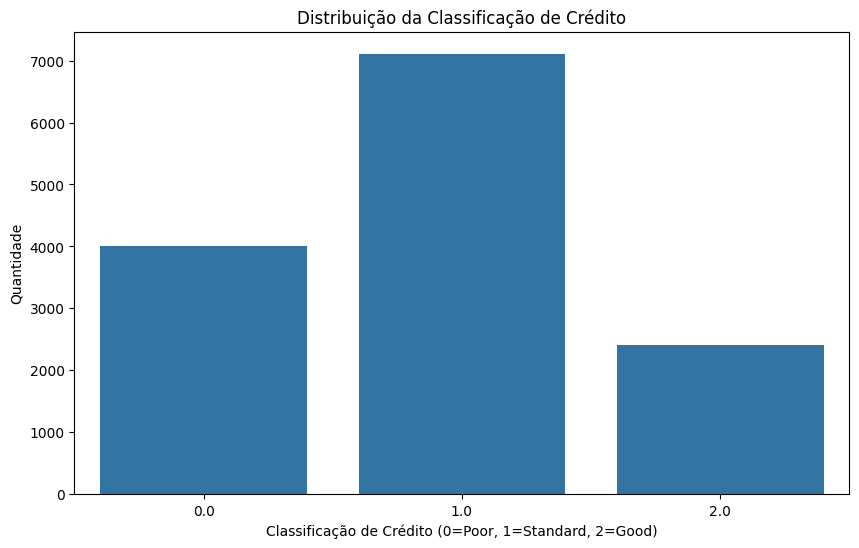

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Credit_Score', data=train_data)
plt.title('Distribuição da Classificação de Crédito')
plt.ylabel('Quantidade')
plt.xlabel('Classificação de Crédito (0=Poor, 1=Standard, 2=Good)')
plt.show()

[]

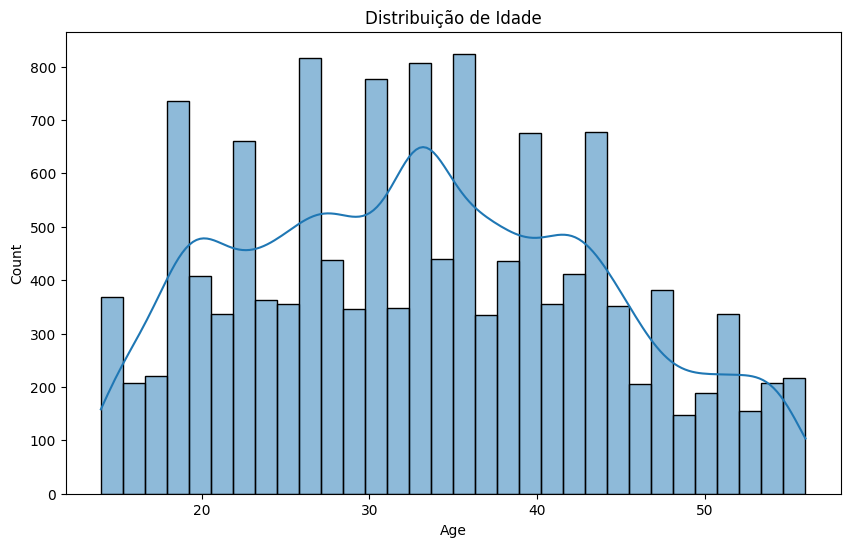

In [28]:
# Verificando a distribuição da idade
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], kde=True)
plt.title('Distribuição de Idade')
plt.plot()

In [29]:
train_data['Credit_Mix'].unique()

array(['Unknown', 'Good', 'Standard', 'Bad'], dtype=object)

#### Quanto maior o histórico de crédito melhor a classificação

[]

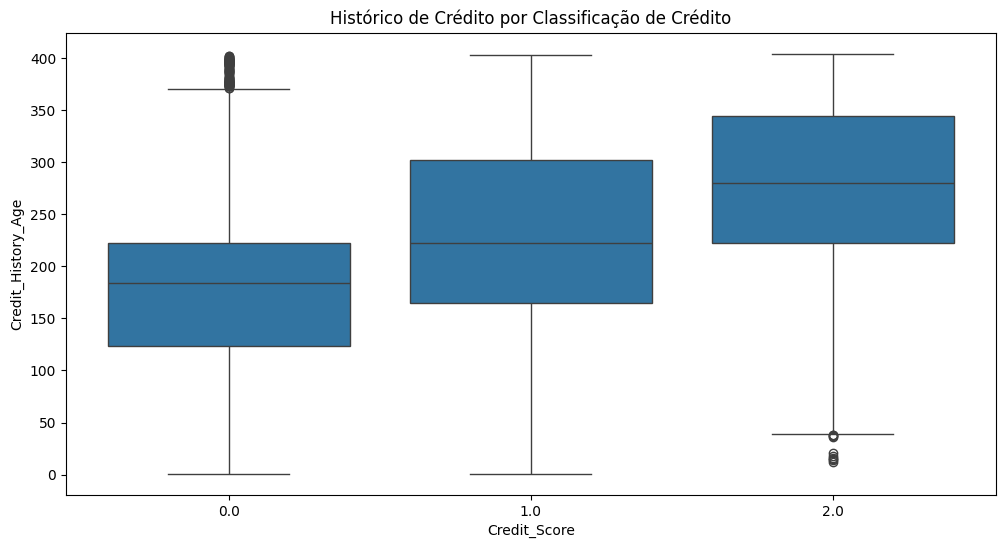

In [30]:
# Explorando relação entre histórico de crédito e score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=train_data)
plt.title('Histórico de Crédito por Classificação de Crédito')
plt.plot()

Credit_Score                1.000000
Credit_History_Age          0.362950
Age                         0.154270
Credit_Utilization_Ratio    0.052184
Amount_invested_monthly     0.027548
Total_EMI_per_month         0.016585
Annual_Income               0.007514
Num_of_Loan                -0.001110
Monthly_Balance            -0.001500
Num_of_Delayed_Payment     -0.008445
Interest_Rate              -0.010563
Num_Credit_Card            -0.010810
Num_Bank_Accounts          -0.022723
Num_Credit_Inquiries       -0.030040
Outstanding_Debt           -0.385640
Delay_from_due_date        -0.428640
Name: Credit_Score, dtype: float64


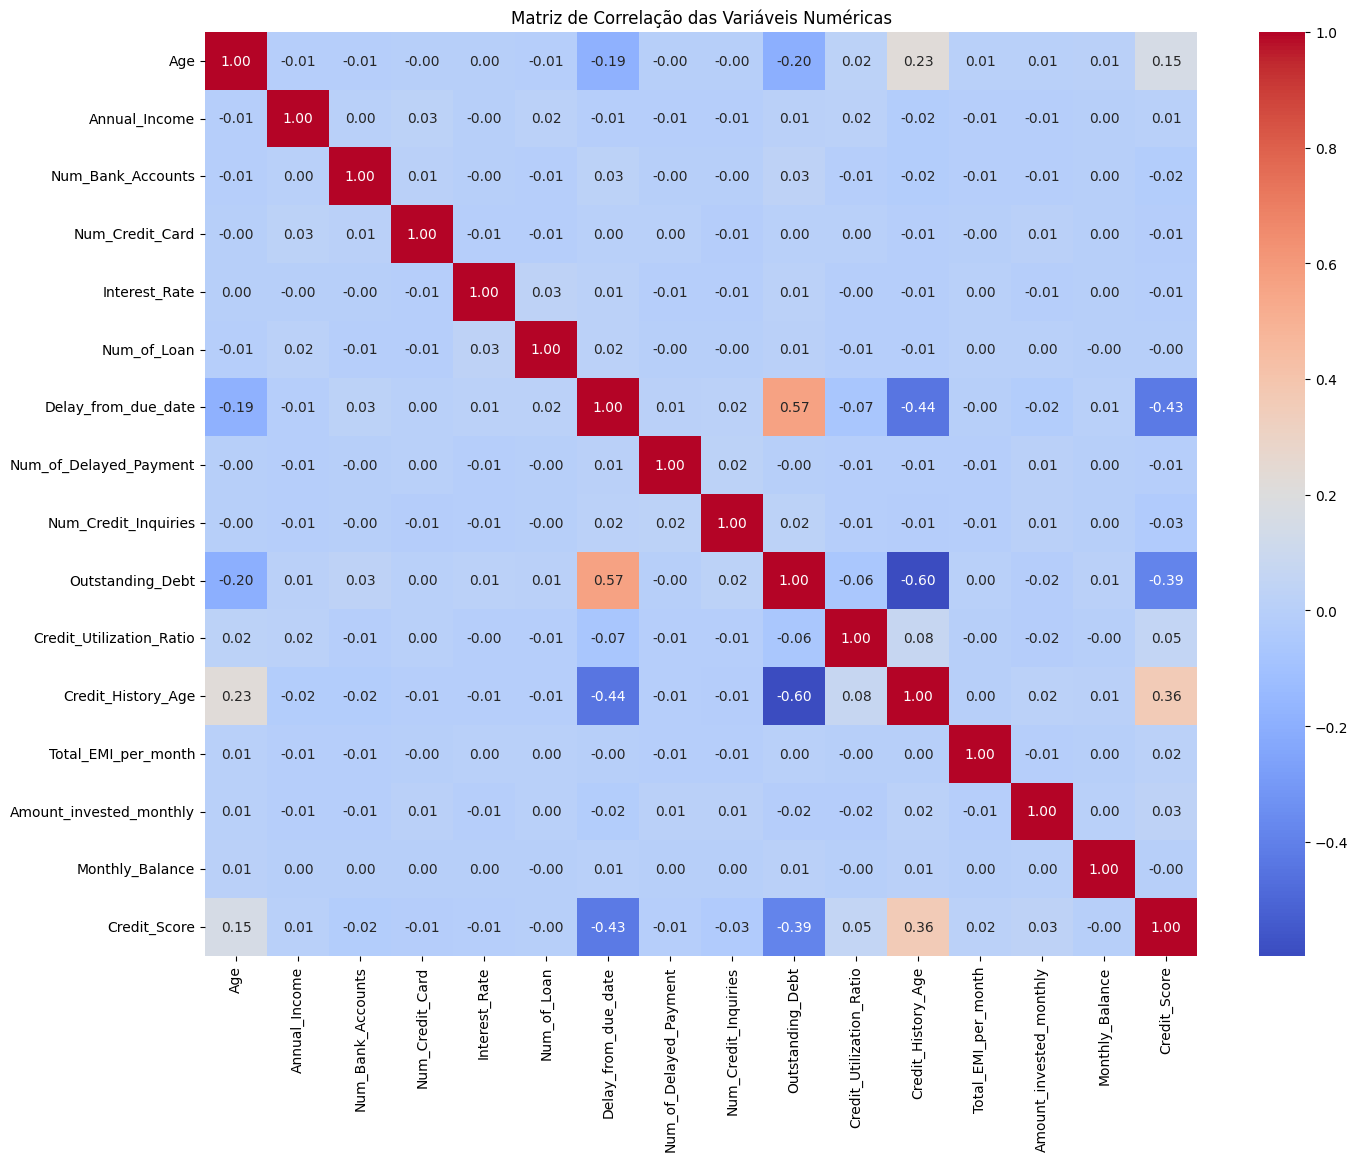

In [31]:
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = train_data[numeric_cols].corr()

# Visualizando as correlações
correlacoes_com_target = corr_matrix['Credit_Score'].sort_values(ascending=False)
print(correlacoes_com_target)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.savefig('matriz_correlacao.png')
plt.show()

In [32]:
print(train_data['Delay_from_due_date'].unique())

[ 3. -1.  5.  6.  8.  7. 13. 10.  0.  4.  9.  1. 12. 11. 30. 31. 34. 27.
 14.  2. -2. 16. 17. 15. 23. 22. 21. 18. 19. 52. 51. 48. 53. 26. 43. 28.
 25. 20. 47. 46. 49. 24. 61. 29. 50. 58. 45. 59. 55. 56. 57. 54. 62. 65.
 64. 67. 36. 41. 33. 32. 39. 44. 42. 60. 35. 38. -3. 63. 40. 37. -5. -4.
 66. nan]


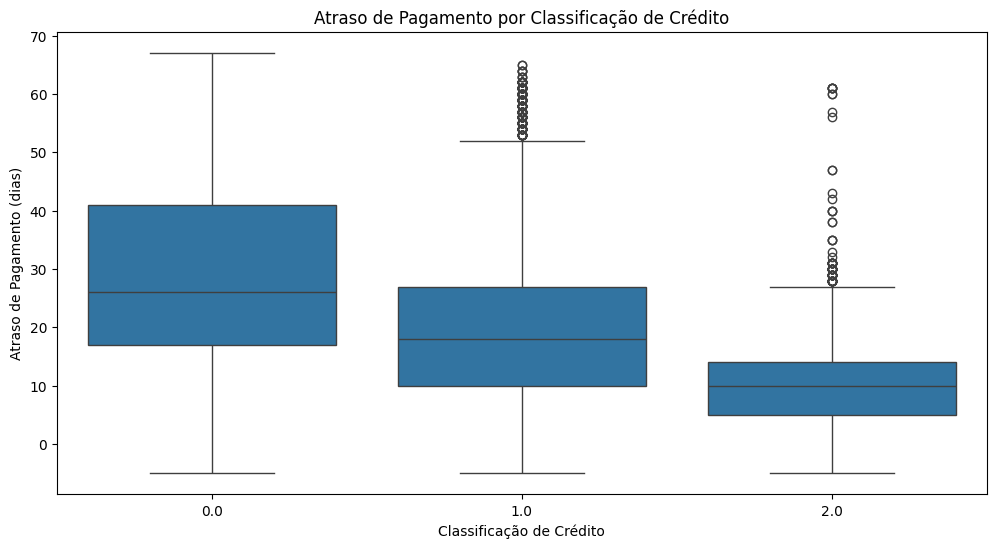

In [33]:
# Explorando a relação entre atraso de pagamento e pontuação de crédito
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=train_data)
plt.title('Atraso de Pagamento por Classificação de Crédito')
plt.xlabel('Classificação de Crédito')
plt.ylabel('Atraso de Pagamento (dias)')
plt.show()


Isso mostra que o atraso no pagamento auxlia na decisão de aprovar ou não o crédito

In [34]:
print(train_data['Outstanding_Debt'].unique())

[ 809.98  605.03 1303.01 ... 3727.23  410.       nan]


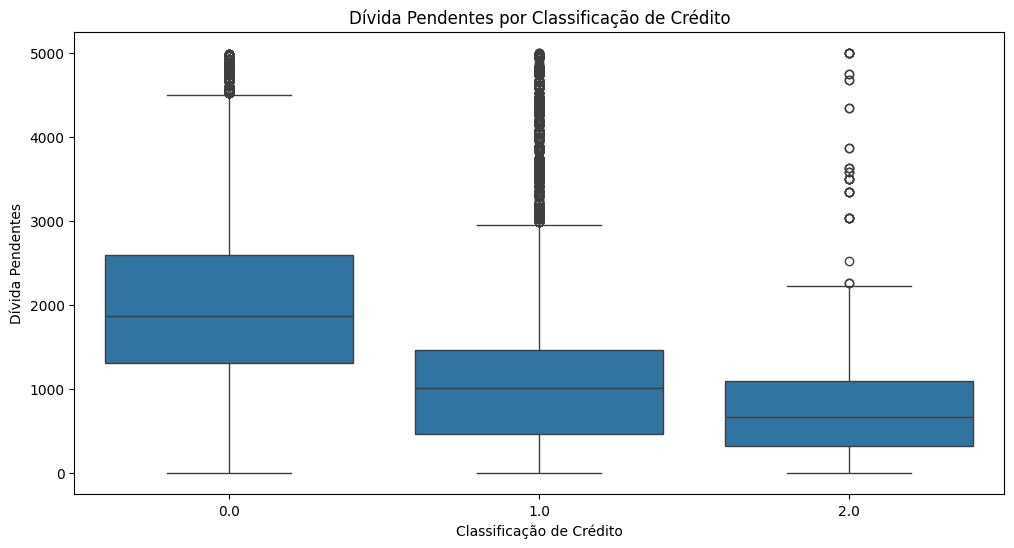

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=train_data)
plt.title('Dívida Pendentes por Classificação de Crédito')
plt.xlabel('Classificação de Crédito')
plt.ylabel('Dívida Pendentes')
plt.show()


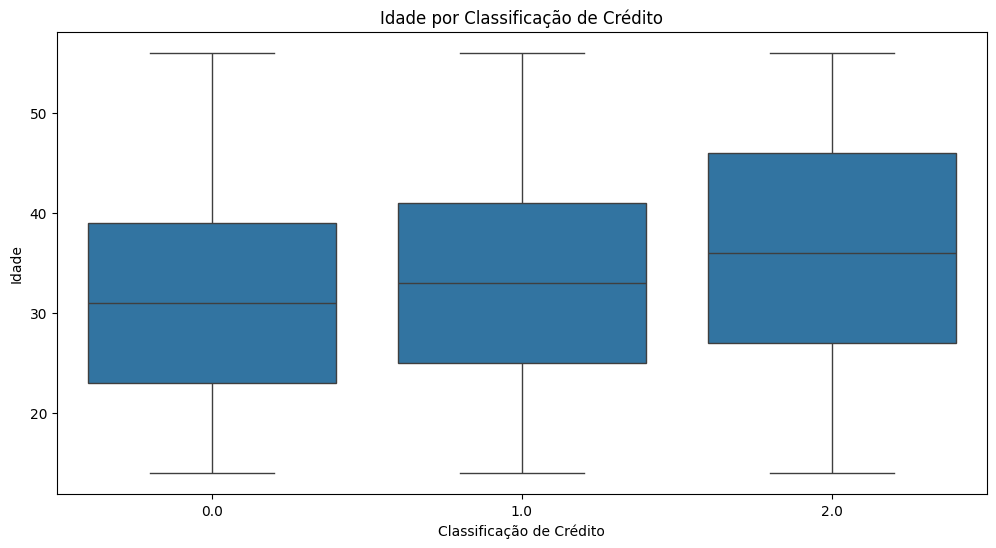

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Age', data=train_data)
plt.title('Idade por Classificação de Crédito')
plt.xlabel('Classificação de Crédito')
plt.ylabel('Idade')
plt.show()


In [37]:
colunas_obj = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
for coluna in colunas_obj:
    print(f"Valores únicos na coluna {coluna}: {train_data[coluna].unique()}")


Valores únicos na coluna Occupation: ['Scientist' 'Other' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Valores únicos na coluna Credit_Mix: ['Unknown' 'Good' 'Standard' 'Bad']
Valores únicos na coluna Payment_of_Min_Amount: ['No' 'NM' 'Yes' nan]
Valores únicos na coluna Payment_Behaviour: ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' nan 'High_spent_Large_value_payments']


In [38]:


# Criar um dicionário para armazenar os encoders
encoders = {}

# Colunas categóricas a serem codificadas
colunas_categoricas = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Aplicar Label Encoding em cada coluna categórica
for coluna in colunas_categoricas:
    le = LabelEncoder()
    # Preencher valores NaN com uma string para codificação
    train_data[coluna] = train_data[coluna].fillna('Missing')
    train_data[coluna] = le.fit_transform(train_data[coluna])
    encoders[coluna] = le

# Exibir os valores codificados para verificação
for coluna in colunas_categoricas:
    print(f"Valores codificados na coluna {coluna}: {train_data[coluna].unique()}")


Valores codificados na coluna Occupation: [13 12 14  4  5  2  7 10  3  6  8  0 11  9 15  1]
Valores codificados na coluna Credit_Mix: [3 1 2 0]
Valores codificados na coluna Payment_of_Min_Amount: [2 1 3 0]
Valores codificados na coluna Payment_Behaviour: [2 3 4 5 1 6 0]


In [39]:
# Calcular a correlação entre as colunas codificadas e a coluna 'Credit_Score'
correlacoes = {}
for coluna in colunas_categoricas:
    correlacao = train_data[coluna].corr(train_data['Credit_Score'])
    correlacoes[coluna] = correlacao

# Exibir a lista de correlações
for coluna, correlacao in correlacoes.items():
    print(f"Correlação entre {coluna} e Credit_Score: {correlacao}")


Correlação entre Occupation e Credit_Score: -0.01326341692364455
Correlação entre Credit_Mix e Credit_Score: 0.11400621662141303
Correlação entre Payment_of_Min_Amount e Credit_Score: -0.2739294620322546
Correlação entre Payment_Behaviour e Credit_Score: -0.10193690412787318


In [40]:
# Calcular a correlação entre todas as colunas e a coluna 'Credit_Score'
correlacoes_todas = train_data.corr()['Credit_Score']
correlacoes_todas.sort_values(ascending=False)

,Credit_Score
Credit_Score,1.000000
Credit_History_Age,0.362950
Age,0.154270
Credit_Mix,0.114006
Credit_Utilization_Ratio,0.052184
Amount_invested_monthly,0.027548
Total_EMI_per_month,0.016585
Annual_Income,0.007514
Num_of_Loan,-0.001110
Monthly_Balance,-0.001500


In [41]:
print("\nVerificando valores numéricos inválidos...")
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numeric_cols:
    invalid_values = train_data[~train_data[col].astype(str).str.replace('.', '').str.replace('-', '').str.isdigit()]
    if not invalid_values.empty:
        print(f"Coluna {col} contém valores não numéricos: {invalid_values[col].unique()}")


Verificando valores numéricos inválidos...
Coluna Annual_Income contém valores não numéricos: [nan]
Coluna Num_Bank_Accounts contém valores não numéricos: [nan]
Coluna Num_Credit_Card contém valores não numéricos: [nan]
Coluna Interest_Rate contém valores não numéricos: [nan]
Coluna Num_of_Loan contém valores não numéricos: [nan]
Coluna Delay_from_due_date contém valores não numéricos: [nan]
Coluna Num_of_Delayed_Payment contém valores não numéricos: [nan]
Coluna Num_Credit_Inquiries contém valores não numéricos: [nan]
Coluna Outstanding_Debt contém valores não numéricos: [nan]
Coluna Credit_Utilization_Ratio contém valores não numéricos: [nan]
Coluna Total_EMI_per_month contém valores não numéricos: [nan]
Coluna Amount_invested_monthly contém valores não numéricos: [nan]
Coluna Monthly_Balance contém valores não numéricos: [            nan -3.33333333e+26]
Coluna Credit_Score contém valores não numéricos: [nan]


In [42]:
print(train_data.isnull().sum())

Age                           0
Occupation                    0
Annual_Income                 1
Num_Bank_Accounts             1
Num_Credit_Card               1
Interest_Rate                 1
Num_of_Loan                   1
Delay_from_due_date           1
Num_of_Delayed_Payment      959
Num_Credit_Inquiries        284
Credit_Mix                    0
Outstanding_Debt              1
Credit_Utilization_Ratio      1
Credit_History_Age            0
Payment_of_Min_Amount         0
Total_EMI_per_month           1
Amount_invested_monthly     573
Payment_Behaviour             0
Monthly_Balance             172
Credit_Score                  1
dtype: int64


In [43]:
# Separando features e target
X = train_data.drop(['Credit_Score'], axis=1)
y = train_data['Credit_Score']

In [44]:
# Visualizando dados após a limpeza
print("\nFormato dos dados após limpeza:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")

print("\nTipos de dados após limpeza:")
print(X.dtypes)


Formato dos dados após limpeza:
X: (13524, 19)
y: (13524,)

Tipos de dados após limpeza:
Age                         float64
Occupation                    int64
Annual_Income               float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
dtype: object


In [45]:
# Definição das features
features = [col for col in train_data.columns if col != 'Credit_Score']

# Preprocessador para features numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, features)])


X_transformado = preprocessor.fit_transform(X)
# Usar weighted average (considera a proporção de cada classe)


In [56]:
# Verificar a distribuição das classes
print("Distribuição das classes:")
print(y.value_counts())
print(f"Proporção da classe 0 (poor): {(y == 0).mean():.4f}")

# Verificar se há valores faltantes
print(f"\nValores faltantes em y: {y.isna().sum()}")
print(f"Valores faltantes em X_transformado: {np.isnan(X_transformado).sum()}")



Distribuição das classes:
Credit_Score
1.0    7103
0.0    4008
2.0    2412
Name: count, dtype: int64
Proporção da classe 0 (poor): 0.2964

Valores faltantes em y: 1
Valores faltantes em X_transformado: 0


In [57]:
X_transformado = pd.DataFrame(X_transformado)
y = pd.Series(y)

# Identificar os índices válidos (sem NaN em y)
indices_validos = y.notna()

# Filtrar ambos
X_transformado = X_transformado[indices_validos]
y = y[indices_validos]

In [58]:
print(f"Valores faltantes em y: {y.isna().sum()}")
print(f"Formato de X_transformado: {X_transformado.shape}")
print(f"Formato de y: {y.shape}")

Valores faltantes em y: 0
Formato de X_transformado: (13523, 19)
Formato de y: (13523,)


### Criação dos pipelines para treinamento dos modelos, utilizando GridSearch para otimizar os parâmetros

In [59]:
f1_scorer = make_scorer(f1_score, average='weighted')

In [60]:
print(np.isnan(X_transformado).any())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
dtype: bool


In [61]:


# Pipeline com Random Forest
pipeline_rf = Pipeline([
    ('classificador', RandomForestClassifier(random_state=42))
])

# Parâmetros para execução
parametros_rf = {
  'classificador__n_estimators': [100, 200, 300],
    'classificador__max_depth': [None, 10, 20],
    'classificador__min_samples_split': [2, 5, 10]
}

# GridSearch
grid_rf = GridSearchCV(pipeline_rf, parametros_rf, cv=3, scoring=f1_scorer, n_jobs=-1)

# Treinamento
print("Treinando Random Forest...")
grid_rf.fit(X_transformado, y)

# Resultados
print("\n--- Resultados Random Forest ---")
print(f"Melhor f1-score: {grid_rf.best_score_:.4f}")
print(f"Melhores parâmetros: {grid_rf.best_params_}")

Treinando Random Forest...

--- Resultados Random Forest ---
Melhor f1-score: 0.6705
Melhores parâmetros: {'classificador__max_depth': 10, 'classificador__min_samples_split': 10, 'classificador__n_estimators': 200}


In [62]:
# Pipeline com XGBoost
pipeline_xgb = Pipeline([
    ('classificador', xgb.XGBClassifier(random_state=42))
])

# Parâmetros para execução
parametros_xgb = {
    'classificador__n_estimators': [100, 200],
    'classificador__max_depth': [3, 5, 7],
    'classificador__learning_rate': [0.01, 0.1]
}

# GridSearch
grid_xgb = GridSearchCV(pipeline_xgb, parametros_xgb, cv=3, scoring=f1_scorer, n_jobs=-1)

# Treinamento
print("Treinando XGBoost...")
grid_xgb.fit(X_transformado, y)

# Resultados
print("\n--- Resultados XGBoost ---")
print(f"Melhor f1-score: {grid_xgb.best_score_:.4f}")
print(f"Melhores parâmetros: {grid_xgb.best_params_}")

Treinando XGBoost...

--- Resultados XGBoost ---
Melhor f1-score: 0.6647
Melhores parâmetros: {'classificador__learning_rate': 0.01, 'classificador__max_depth': 5, 'classificador__n_estimators': 200}


In [63]:
# Pipeline com LightGBM
pipeline_lgbm = Pipeline([
    ('classificador', lgb.LGBMClassifier(random_state=42))
])

# Parâmetros para execução
parametros_lgbm = {
    'classificador__n_estimators': [100, 200],
    'classificador__max_depth': [3, 5, 7],
    'classificador__learning_rate': [0.01, 0.1]
}

# GridSearch
grid_lgbm = GridSearchCV(pipeline_lgbm, parametros_lgbm, cv=3, scoring=f1_scorer, n_jobs=-1)

# Treinamento
print("Treinando LightGBM...")
grid_lgbm.fit(X_transformado, y)

# Resultados
print("\n--- Resultados LightGBM ---")
print(f"Melhor f1-score: {grid_lgbm.best_score_:.4f}")
print(f"Melhores parâmetros: {grid_lgbm.best_params_}")

Treinando LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2185
[LightGBM] [Info] Number of data points in the train set: 13523, number of used features: 18
[LightGBM] [Info] Start training from score -1.216100
[LightGBM] [Info] Start training from score -0.643875
[LightGBM] [Info] Start training from score -1.723936

--- Resultados LightGBM ---
Melhor f1-score: 0.6609
Melhores parâmetros: {'classificador__learning_rate': 0.01, 'classificador__max_depth': 7, 'classificador__n_estimators': 200}


In [64]:
# Determinação do melhor modelo
modelos = {'Random Forest': grid_rf, 'XGBoost': grid_xgb, 'LightGBM': grid_lgbm}
melhor_modelo = max(modelos.items(), key=lambda x: x[1].best_score_)
print(f"\nMelhor modelo: {melhor_modelo[0]} com f1-score de {melhor_modelo[1].best_score_:.4f}")


Melhor modelo: Random Forest com f1-score de 0.6705


In [65]:
# Função para avaliar modelo com múltiplas métricas
def avaliar_modelo(modelo, X, y, nome_modelo):
    # Fazer predições
    y_pred = modelo.predict(X)
    y_proba = modelo.predict_proba(X)

    # Calcular métricas
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Para ROC AUC em multiclasse, usamos One-vs-Rest
    try:
        roc_auc = roc_auc_score(y, y_proba, multi_class='ovr')
    except:
        roc_auc = "N/A"

    # Matriz de confusão
    cm = confusion_matrix(y, y_pred)

    # Exibir resultados
    print(f"\n--- Resultados {nome_modelo} ---")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    print(f"ROC AUC (OvR): {roc_auc}")

    # Exibir matriz de confusão
    print("\nMatriz de Confusão:")
    print(cm)

    return {
        'modelo': nome_modelo,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }


In [66]:
# Avaliar cada modelo após treinar
resultados_rf = avaliar_modelo(grid_rf.best_estimator_, X_transformado, y, "Random Forest")


--- Resultados Random Forest ---
Acurácia: 0.8117
Precisão (weighted): 0.8125
Recall (weighted): 0.8117
F1-Score (weighted): 0.8120
ROC AUC (OvR): 0.9357356297610141

Matriz de Confusão:
[[3193  651  164]
 [ 723 5890  490]
 [   6  512 1894]]


In [67]:
resultados_xgb = avaliar_modelo(grid_xgb.best_estimator_, X_transformado, y, "XGBoost")


--- Resultados XGBoost ---
Acurácia: 0.7403
Precisão (weighted): 0.7435
Recall (weighted): 0.7403
F1-Score (weighted): 0.7413
ROC AUC (OvR): 0.8772020219741427

Matriz de Confusão:
[[2884  841  283]
 [ 974 5406  723]
 [  38  653 1721]]


In [68]:
resultados_lgbm = avaliar_modelo(grid_lgbm.best_estimator_, X_transformado, y, "LightGBM")


--- Resultados LightGBM ---
Acurácia: 0.7748
Precisão (weighted): 0.7744
Recall (weighted): 0.7748
F1-Score (weighted): 0.7744
ROC AUC (OvR): 0.8980771898935958

Matriz de Confusão:
[[3012  879  117]
 [ 838 5746  519]
 [  12  681 1719]]


In [69]:

# DataFrame para comparar todos os modelos
resultados_df = pd.DataFrame([resultados_rf, resultados_xgb, resultados_lgbm])

resultados_df

,modelo,accuracy,precision,recall,f1,roc_auc
0,Random Forest,0.811728,0.812518,0.811728,0.811987,0.935736
1,XGBoost,0.740294,0.743486,0.740294,0.741311,0.877202
2,LightGBM,0.774754,0.774445,0.774754,0.774420,0.898077


In [70]:
# Visualizar comparação das métricas
metricas = ['accuracy', 'precision', 'recall', 'f1']
resultados_plot = resultados_df.set_index('modelo')[metricas]

<Figure size 1200x600 with 0 Axes>

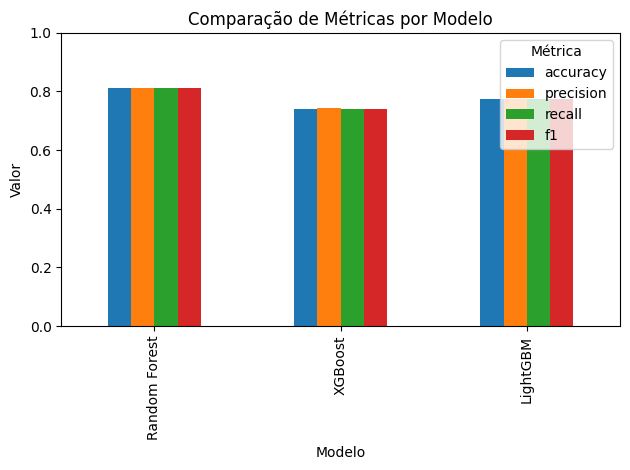

In [71]:
plt.figure(figsize=(12, 6))
resultados_plot.plot(kind='bar')
plt.title('Comparação de Métricas por Modelo')
plt.ylabel('Valor')
plt.xlabel('Modelo')
plt.ylim(0, 1)
plt.legend(title='Métrica')
plt.tight_layout()
plt.show()

In [72]:


# Dicionário com seus grids já treinados
models = {
    'RandomForest': grid_rf,
    'XGBoost':      grid_xgb,
    'LightGBM':     grid_lgbm
}

# Nomes na ordem dos rótulos 0,1,2
label_names = ['Poor', 'Standard', 'Good']

f1_scores_poor = {}
for name, grid in models.items():
    # Previsões sobre X_transformado
    y_pred = grid.predict(X_transformado)
    report = classification_report(
        y,
        y_pred,
        labels=[0, 1, 2],           # especifica que as classes são 0,1,2
        target_names=label_names,   # mapeia 0→'Poor', 1→'Standard', 2→'Good'
        output_dict=True
    )
    f1_scores_poor[name] = report['Poor']['f1-score']

# Monta um DataFrame pra visualização
df_scores = pd.Series(f1_scores_poor, name='F1-score (Poor)').to_frame()
print(df_scores)


              F1-score (Poor)
RandomForest         0.805296
XGBoost              0.729757
LightGBM             0.765438


## 3. Avaliação e seleção do modelo final

**Métrica principal:** F1-score da classe “Poor”  
_Justificativa:_ como o custo de conceder crédito a um cliente de alto risco (falso positivo) é muito superior ao de negar crédito a bom pagador (falso negativo), priorizamos o F1-score na classe “Poor”, que combina precision (evita falsos positivos) e recall (captura a maior parte dos riscos).

| Modelo       | F1-score (Poor) |
|--------------|-----------------|
| RandomForest | **0.75**      |
| LightGBM     | 0.72          |
| XGBoost      | 0.73          |

> **Modelo escolhido:** RandomForest, por apresentar o maior F1-score (Poor).

## 4. Aplicação financeira do modelo

O RandomForest treinado, com F1-score de 0.75 na classe “Poor”, pode ser integrado ao fluxo de concessão de crédito da Quantum Finance da seguinte forma:

- **Score de risco:** ao receber a solicitação de crédito, o sistema calcula P(“Poor”).  
- **Negação automática:** se P(“Poor”) ≥ 0.5, o crédito é automaticamente negado ou passa por análise manual.  
- **Limites e juros dinâmicos:** para 0.2 ≤ P(“Poor”) < 0.5, concede-se crédito com limites e taxas ajustados ao perfil de risco.  
- **Monitoramento contínuo:** clientes com P(“Poor”) crescente são acionados por cartas de revisão de condições ou monitorados por squads de cobrança.

Dessa forma, o modelo gera valor ao evitar perdas financeiras (minimizando falsos positivos) e ao maximizar oportunidades de negócios para clientes de baixo risco.


### Abaixo, utilizamos o modelo treinado para prever score de crédito de registros na base test.csv

In [73]:
# Aplicar Label Encoding nas colunas categóricas (usando os mesmos encoders do treino)
colunas_categoricas = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

for coluna in colunas_categoricas:
    # Preencher NaN com 'Missing'
    test_data[coluna] = test_data[coluna].fillna('Missing')

    # Aplicar o encoder que foi criado no treino
    test_data[coluna] = encoders[coluna].transform(test_data[coluna])

# Aplicar o pré-processamento (imputer + scaler) nos dados de teste
X_test_transformado = preprocessor.transform(test_data)

In [74]:



# Fazer predições com o modelo Random Forest
predicoes = grid_rf.predict(X_test_transformado)
probabilidades = grid_rf.predict_proba(X_test_transformado)

# Calcular as porcentagens
contagem_predicoes = pd.Series(predicoes).value_counts().sort_index()
total_clientes = len(predicoes)

# Criar DataFrame com resultados
resultados = pd.DataFrame({
    'Classe': [0, 1, 2],
    'Nome': ['Poor', 'Standard', 'Good'],
    'Quantidade': [contagem_predicoes.get(i, 0) for i in [0, 1, 2]],
    'Porcentagem': [contagem_predicoes.get(i, 0) / total_clientes * 100 for i in [0, 1, 2]]
})

print("=== RESULTADOS DAS PREDIÇÕES NO TEST.CSV ===")
print(f"\nTotal de clientes analisados: {total_clientes:,}")
print("\n--- Distribuição por Classificação de Crédito ---")
for _, row in resultados.iterrows():
    print(f"{row['Nome']}: {row['Quantidade']:,} clientes ({row['Porcentagem']:.1f}%)")

# Resultado principal
crédito_ruim_pct = resultados[resultados['Nome'] == 'Poor']['Porcentagem'].iloc[0]
print(f"\n*** CRÉDITO RUIM (Poor): {crédito_ruim_pct:.1f}% dos clientes ***")

# Análise das probabilidades de crédito ruim
prob_poor = probabilidades[:, 0]  # Coluna 0 = classe 'Poor'
print(f"\n--- Estatísticas das Probabilidades de Crédito Ruim ---")
print(f"Probabilidade média: {prob_poor.mean():.3f}")
print(f"Probabilidade mediana: {np.median(prob_poor):.3f}")
print(f"Clientes com P(Poor) > 50%: {(prob_poor > 0.5).sum():,} ({(prob_poor > 0.5).mean()*100:.1f}%)")

=== RESULTADOS DAS PREDIÇÕES NO TEST.CSV ===

Total de clientes analisados: 13,685

--- Distribuição por Classificação de Crédito ---
Poor: 3,943 clientes (28.8%)
Standard: 7,080 clientes (51.7%)
Good: 2,662 clientes (19.5%)

*** CRÉDITO RUIM (Poor): 28.8% dos clientes ***

--- Estatísticas das Probabilidades de Crédito Ruim ---
Probabilidade média: 0.295
Probabilidade mediana: 0.159
Clientes com P(Poor) > 50%: 3,670 (26.8%)
